**Loan pay off**

-------------------------

Data.

In [5]:
#cài đặt thư viện
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#đọc dataset
link='https://drive.google.com/file/d/1aSOvZUKSXQy1pCD9N5r5YrDbe2gqzwt0/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
dataset=pd.read_csv(path)
dataset.head(5)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
#xem tổng quan về dataset => có 346 dòng và 10 cột
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [4]:
for column in dataset.columns:
    value_counts = dataset[column].value_counts()
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: Unnamed: 0.1
0      1
265    1
273    1
272    1
271    1
      ..
135    1
134    1
133    1
132    1
399    1
Name: Unnamed: 0.1, Length: 346, dtype: int64

Column: Unnamed: 0
0      1
265    1
273    1
272    1
271    1
      ..
135    1
134    1
133    1
132    1
399    1
Name: Unnamed: 0, Length: 346, dtype: int64

Column: loan_status
PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Column: Principal
1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

Column: terms
30    184
15    148
7      14
Name: terms, dtype: int64

Column: effective_date
9/11/2016    166
9/12/2016     87
9/10/2016     31
9/14/2016     31
9/13/2016     20
9/9/2016       8
9/8/2016       3
Name: effective_date, dtype: int64

Column: due_date
10/10/2016    90
9/25/2016     63
9/26/2016     42
10/11/2016    36
10/13/2016    19
10/9/2016     18
9/24/2016     12
9/27/2016     11
9/28/2016     10
11/9/2016      6
10/12/2016     6
10/8/2016      5
10

In [5]:
#có hai cột Unnamed bị thừa => xóa đi
dataset.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [6]:
#check giá trị null => không có giá trị null
dataset.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [7]:
#cột effective_date và due_date đang ở dạng object => đổi sang dạng date time
dataset['effective_date'] = pd.to_datetime(dataset['effective_date'])
dataset['due_date'] = pd.to_datetime(dataset['due_date'])
dataset.dtypes

loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

In [8]:
#đổi tên cột sang định dạng viết hoa chữ cái đầu tiên
dataset.rename(columns=lambda x:x.capitalize(), inplace=True)

In [9]:
#mã hóa biến dạng chữ sang dạng số
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
dataset['Loan_status']=label_encoder.fit_transform(dataset['Loan_status'])
dataset['Education'] = label_encoder.fit_transform(dataset['Education'])
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset.head(5)

,Loan_status,Principal,Terms,Effective_date,Due_date,Age,Education,Gender
0,1,1000,30,2016-09-08,2016-10-07,45,1,1
1,1,1000,30,2016-09-08,2016-10-07,33,0,0
2,1,1000,15,2016-09-08,2016-09-22,27,3,1
3,1,1000,30,2016-09-09,2016-10-08,28,3,0
4,1,1000,30,2016-09-09,2016-10-08,29,3,1


<ipython-input-10-dff1dae3a36a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')


<Axes: >

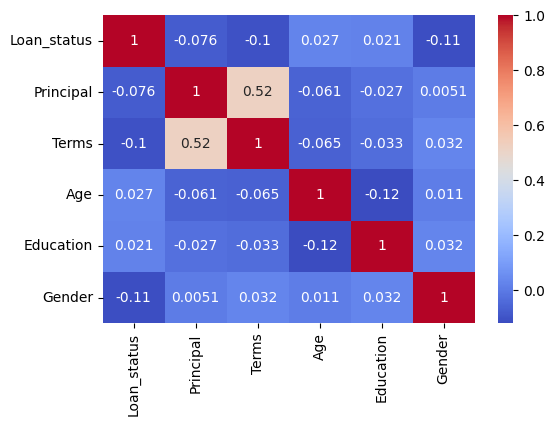

In [10]:
#hiển thị quan hệ tương quan giữa các cột
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

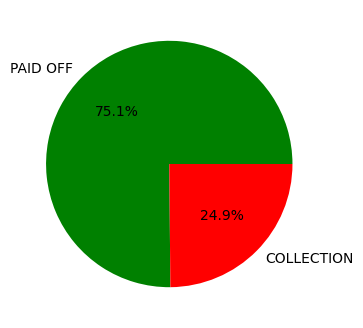

In [ ]:
#tương quan giữa KH đã thanh toán và chưa thanh toán đúng hạn
paid_off_samples = len(dataset[dataset.Loan_status==1])
collection_samples = len(dataset[dataset.Loan_status==0])
total_samples = paid_off_samples + collection_samples

paid_off_percentage = (paid_off_samples / total_samples) * 100
collection_percentage = (collection_samples / total_samples) * 100

labels = ['PAID OFF', 'COLLECTION']
sizes = [paid_off_percentage, collection_percentage]
colors = ['green', 'red']

plt.title=['Loan status']
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()
#24.9% khách hàng không thanh toán đúng kỳ hạn => cần tìm ra nguyên nhân.

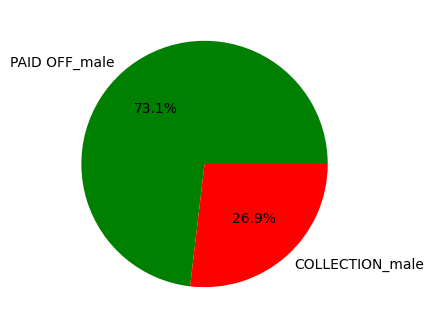

In [ ]:
#tỉ lệ KH đã thanh toán trên từng giới tính
#KH là nam
male_samples = len(dataset[dataset.Gender==1])
paid_male_samples = len(dataset[(dataset['Gender'] == 1) & (dataset['Loan_status'] == 1)])
paid_male_percentage = (paid_male_samples/male_samples)*100
collection_male_percentage = 100 - paid_male_percentage

labels = ['PAID OFF_male', 'COLLECTION_male']
sizes = [paid_male_percentage, collection_male_percentage]
colors = ['green', 'red']

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()



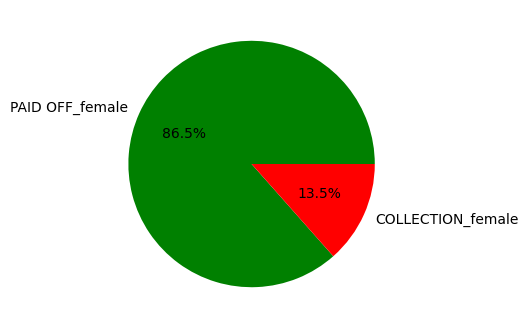

In [ ]:
#KH là nữ
female_samples = len(dataset[dataset.Gender==0])
paid_female_samples = len(dataset[(dataset['Gender'] == 0) & (dataset['Loan_status'] == 1)])
paid_female_percentage = (paid_female_samples/female_samples)*100
collection_female_percentage = 100 - paid_female_percentage

labels = ['PAID OFF_female', 'COLLECTION_female']
sizes = [paid_female_percentage, collection_female_percentage]
colors = ['green', 'red']

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()
#nhiều KH là nam chậm thanh toán hơn so với KH là nữ, 26.9% so với 13.5%

In [11]:
#đếm số khách hàng theo kỳ thanh toán
terms_count = dataset['Terms'].value_counts().sort_index()
print(terms_count)

7      14
15    148
30    184
Name: Terms, dtype: int64


In [12]:
#đếm số khác hàng ở trạng thái chưa thanh toán theo từng kỳ thanh toán
collection_counts= dataset[dataset['Loan_status'] == 1].groupby('Terms').size().reset_index(name='Số lượng COLLECTION')
print(collection_counts)

   Terms  Số lượng COLLECTION
0      7                   14
1     15                  114
2     30                  132


In [13]:
percentage_collection = (collection_counts['Số lượng COLLECTION'] / collection_counts['Số lượng COLLECTION'].sum()
).multiply(100).round(2)
percentage_collection


0     5.38
1    43.85
2    50.77
Name: Số lượng COLLECTION, dtype: float64

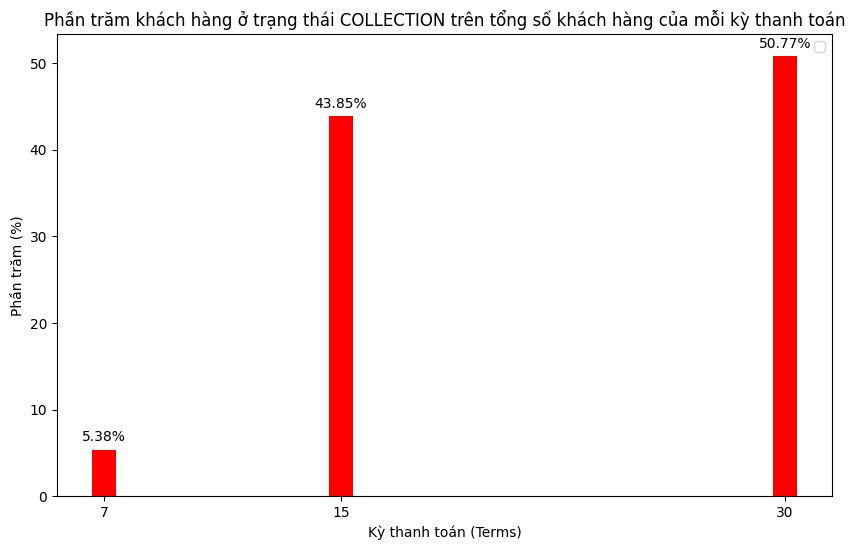

In [14]:
#tỷ lệ khách hàng chưa thanh toán theo từng kỳ thanh toán
plt.figure(figsize=(10, 6))
bars = plt.bar(terms_count.index, percentage_collection, color='red')
for bar, percent in zip(bars, percentage_collection):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percent}%', ha='center')
plt.xlabel('Kỳ thanh toán (Terms)')
plt.ylabel('Phần trăm (%)')
plt.title('Phần trăm khách hàng ở trạng thái COLLECTION trên tổng số khách hàng của mỗi kỳ thanh toán')
plt.xticks(terms_count.index)
plt.legend()
plt.show()
#khách hàng thanh toán 15 ngày và 30 ngày có tỷ lệ chậm thanh toán cao nhất

In [15]:
#lựa biến
y=dataset['Loan_status']
X=dataset[['Gender', 'Terms', 'Principal', 'Age', 'Education']]

In [16]:
#chia tập train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)

Model

In [17]:
#xây dựng mô hình Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Evaluate

In [18]:
model.score(X_test, y_test)

0.7692307692307693

In [19]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0, 24],
       [ 0, 80]])

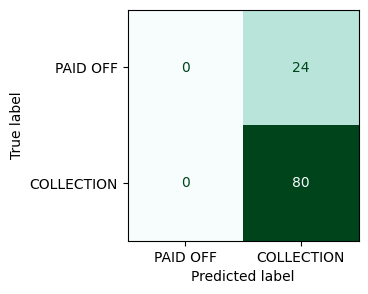

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(3, 3))
labels = ['PAID OFF', 'COLLECTION']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")
#mô hình có tỷ lệ dự báo chính xác cao là 0.76 nhưng không dự báo được giá trị kh chưa thanh toán nào do mất cân bằng dữ liệu giữa 2 lớp
# => xử lý mất cân bằng dữ liệu trước khi chia tập train và tập test

In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.77      1.00      0.87        80

    accuracy                           0.77       104
   macro avg       0.38      0.50      0.43       104
weighted avg       0.59      0.77      0.67       104



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#xử lý mất cân bằng dữ liệu bằng oversampling imblearn
from imblearn.over_sampling import RandomOverSampler
ROS_Model=RandomOverSampler()
X_over, y_over=ROS_Model.fit_resample(X_train,y_train)
X_over.shape, y_over.shape

((360, 5), (360,))

In [24]:
X_train=X_over
y_train=y_over
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
#tỷ lệ dự báo đúng lớp 0 -KH chưa thanh toán thấp (19%), tổng thể dự báo lớp 0 thấp (28%) nên chưa đáp ứng nhu cầu dự báo

              precision    recall  f1-score   support

           0       0.19      0.50      0.28        24
           1       0.71      0.36      0.48        80

    accuracy                           0.39       104
   macro avg       0.45      0.43      0.38       104
weighted avg       0.59      0.39      0.43       104



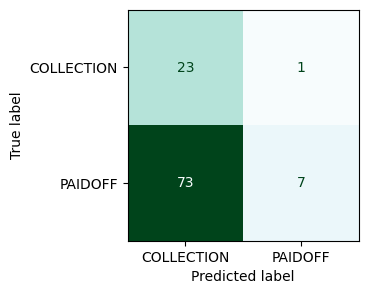

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(3, 3))
labels = ['COLLECTION', 'PAIDOFF']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")

In [26]:
#xử lý mất cân bằng dữ liệu bằng phương pháp NearMiss
!pip install imbalanced-learn
from imblearn.under_sampling import NearMiss
NearMiss_Model=NearMiss(version=3) # Chúng ta có 3 phương pháp NearMiss 1,2,3
X_under, y_under=NearMiss_Model.fit_resample(X_train,y_train)
X_under.shape, y_under.shape #Kích thước của X và y đã được lấy mẫu lại

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


((293, 5), (293,))

In [30]:
X_train=X_under
y_train=y_under
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
#tỷ lệ dự báo đúng lớp 0 cao hơn pp oversampling imblearn (24%) và tỷ lệ bao phủ cao (96%), dẫn tới tổng thể dự báo lớp 0 cao hơn (38%)

              precision    recall  f1-score   support

           0       0.24      0.96      0.38        24
           1       0.88      0.09      0.16        80

    accuracy                           0.29       104
   macro avg       0.56      0.52      0.27       104
weighted avg       0.73      0.29      0.21       104



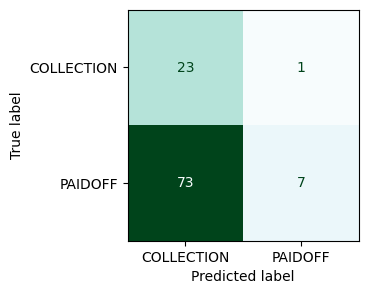

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(3, 3))
labels = ['COLLECTION', 'PAIDOFF']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")

In [52]:
#xử lý cân bằng dữ liệu bằng phương pháp SMOTE
from imblearn.over_sampling import SMOTE
SM_Model=SMOTE()
X_SM, y_SM=ROS_Model.fit_resample(X_train,y_train)
X_SM.shape, y_SM.shape

((128, 5), (128,))

In [53]:
X_train=X_SM
y_train=y_SM
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
#tỷ lệ dự báo đúng lớp 0 là 52%, tỷ lệ bao phủ lớp 0 là 43%, tổng thể hiệu quả dự báo lớp 0 là 47%

              precision    recall  f1-score   support

           0       0.52      0.43      0.47        30
           1       0.37      0.45      0.41        22

    accuracy                           0.44        52
   macro avg       0.45      0.44      0.44        52
weighted avg       0.46      0.44      0.45        52



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
#xử lý mất cân bằng dữ liệu bằng phương pháp chia dataset thủ công
dataset_0=dataset[dataset.Loan_status==0]
dataset_1=dataset[dataset.Loan_status==1]
dataset_0.shape, dataset_1.shape

((86, 8), (260, 8))

In [55]:
dataset_1_reshaped=dataset_1.sample(86)

In [56]:
dataset_1_reshaped.shape

(86, 8)

In [57]:
dataset_new=pd.concat([dataset_0, dataset_1_reshaped])

In [58]:
dataset_new.head(5)

,Loan_status,Principal,Terms,Effective_date,Due_date,Age,Education,Gender
260,0,1000,15,2016-09-09,2016-09-23,29,3,1
261,0,1000,30,2016-09-09,2016-10-08,37,1,1
262,0,800,15,2016-09-09,2016-09-23,27,3,1
263,0,800,15,2016-09-09,2016-09-23,24,0,1
264,0,800,15,2016-09-10,2016-10-09,28,3,1


In [59]:
y=dataset_new['Loan_status'].values
X=dataset_new[['Gender', 'Terms', 'Principal', 'Age', 'Education']].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1)
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
#tỷ lệ dự báo đúng lớp 0 là 52%, tỷ lệ bao phủ lớp 0 là 40% (thấp hơn pp undersampling thủ công) và tổng thể dự báo lớp 0 cũng cao hơn 45%

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46        30
           1       0.35      0.41      0.38        22

    accuracy                           0.42        52
   macro avg       0.42      0.42      0.42        52
weighted avg       0.43      0.42      0.43        52



In [ ]:
#như vậy sử dụng pp xử lý mất cân bằng dữ liệu bằng phương pháp undersampling thủ công cho kết quả dự báo tốt hơn

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [62]:
models = [
    SVR(kernel='linear'),
    RandomForestRegressor(n_estimators=100),
    DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=int(10))]

In [64]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix for {model.__class__.__name__}:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report for {model.__class__.__name__}:\n{classification_report(y_test, y_pred)}")

ValueError: ignored

**Dự báo Heart Disease**

---



Data

In [6]:
link='https://drive.google.com/file/d/1uv6IA63cXlvgOcvvVF6TAhY2HWZLZ8-v/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
dataset = pd.read_csv(path)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [6]:
dataset.head(5)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [7]:
for column in dataset.columns:
    value_counts = dataset[column].value_counts()
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: age
58    19
57    17
54    16
59    14
52    13
60    12
51    12
56    11
62    11
44    11
64    10
41    10
67     9
63     9
42     8
43     8
45     8
53     8
55     8
61     8
65     8
50     7
66     7
48     7
46     7
47     5
49     5
70     4
68     4
35     4
39     4
69     3
71     3
40     3
34     2
37     2
38     2
29     1
77     1
74     1
76     1
Name: age, dtype: int64

Column: sex
1    206
0     97
Name: sex, dtype: int64

Column: cp
4    144
3     86
2     50
1     23
Name: cp, dtype: int64

Column: trestbps
120    37
130    36
140    32
110    19
150    17
138    12
128    12
160    11
125    11
112     9
132     8
118     7
124     6
108     6
135     6
152     5
134     5
145     5
100     4
170     4
122     4
126     3
136     3
115     3
180     3
142     3
105     3
102     2
146     2
144     2
148     2
178     2
94      2
165     1
123     1
114     1
154     1
156     1
106     1
155     1
172     1
200     1
101     1
129     1
192     1
1

In [7]:
dataset.drop(dataset[(dataset['num'] >1)].index, inplace=True)

In [8]:
print(dataset[dataset == '?'].dropna(how='all'))


     age  sex  cp  trestbps  fbs  restecg  thalach  exang  oldpeak  slope  \
87   NaN  NaN NaN       NaN  NaN      NaN      NaN    NaN      NaN    NaN   
166  NaN  NaN NaN       NaN  NaN      NaN      NaN    NaN      NaN    NaN   
192  NaN  NaN NaN       NaN  NaN      NaN      NaN    NaN      NaN    NaN   
287  NaN  NaN NaN       NaN  NaN      NaN      NaN    NaN      NaN    NaN   
302  NaN  NaN NaN       NaN  NaN      NaN      NaN    NaN      NaN    NaN   

      ca thal  num  chol  
87   NaN    ?  NaN   NaN  
166    ?  NaN  NaN   NaN  
192    ?  NaN  NaN   NaN  
287    ?  NaN  NaN   NaN  
302    ?  NaN  NaN   NaN  


In [9]:
dataset.replace('?', np.nan, inplace=True)

In [10]:
dataset.dropna(inplace=True)
dataset

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
5,56,1,2,120,0,0,178,0,0.8,1,0,3,0,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63,0,4,124,0,0,136,1,0.0,2,0,3,1,197
295,41,1,2,120,0,0,182,0,0.0,1,0,3,0,157
297,57,0,4,140,0,0,123,1,0.2,2,0,7,1,241
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       214 non-null    int64  
 1   sex       214 non-null    int64  
 2   cp        214 non-null    int64  
 3   trestbps  214 non-null    int64  
 4   fbs       214 non-null    int64  
 5   restecg   214 non-null    int64  
 6   thalach   214 non-null    int64  
 7   exang     214 non-null    int64  
 8   oldpeak   214 non-null    float64
 9   slope     214 non-null    int64  
 10  ca        214 non-null    object 
 11  thal      214 non-null    object 
 12  num       214 non-null    int64  
 13  chol      214 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 25.1+ KB


<ipython-input-13-c299426c6052>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')


<Axes: >

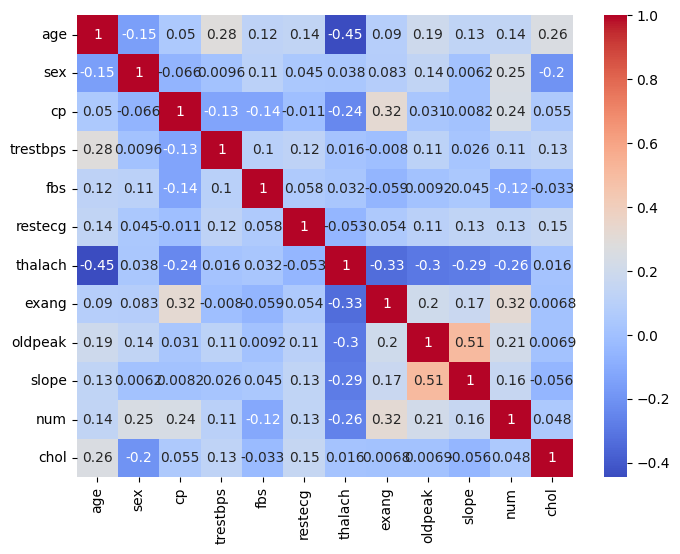

In [13]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

In [11]:
y=dataset['num']
X=dataset.iloc[:,:-2]

In [15]:
X

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,1,2,150,0,2.3,3,0,6
2,67,1,4,120,0,2,129,1,2.6,2,2,7
3,37,1,3,130,0,0,187,0,3.5,3,0,3
4,41,0,2,130,0,2,172,0,1.4,1,0,3
5,56,1,2,120,0,0,178,0,0.8,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
294,63,0,4,124,0,0,136,1,0.0,2,0,3
295,41,1,2,120,0,0,182,0,0.0,1,0,3
297,57,0,4,140,0,0,123,1,0.2,2,0,7
298,45,1,1,110,0,0,132,0,1.2,2,0,7


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)

Model

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

Evaluate

In [18]:
model.score(X_test, y_test)

0.8307692307692308

In [19]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[46,  4],
       [ 7,  8]])

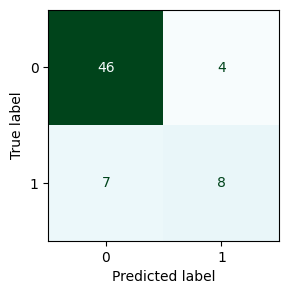

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(3, 3))
labels = ['0', '1']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")

In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#tỷ lệ lớp 1 (KH bị bệnh tim) được dự báo đúng là 67%, có 53% mẫu dữ liệu được dự báo và độ chính xác của mô hình phân loại cho lớp 1 là 59%

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        50
           1       0.67      0.53      0.59        15

    accuracy                           0.83        65
   macro avg       0.77      0.73      0.74        65
weighted avg       0.82      0.83      0.82        65



In [45]:
#thử nghiệm các mô hình khác để xem kết quả dự báo có tốt hơn không


In [22]:
#naive bayes classification
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred=GNB.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8

In [50]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[42,  8],
       [ 5, 10]])

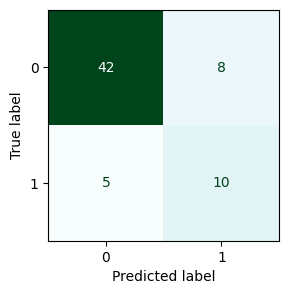

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(3, 3))
labels = ['0', '1']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")

In [53]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#tỷ lệ lớp 1 (KH bị bệnh tim) được dự báo đúng là 56% thấp hơn ở mô hình logistic nhưng có 67% mẫu dữ liệu được dự báo và độ chính xác của mô hình phân loại cho lớp 1 là 61%

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        50
           1       0.56      0.67      0.61        15

    accuracy                           0.80        65
   macro avg       0.72      0.75      0.74        65
weighted avg       0.82      0.80      0.81        65



In [130]:
#decision tree
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_train, y_train)
y_pred=model_tree.predict(X_test)

In [131]:
model_tree.score(X_test,y_test)

0.7384615384615385

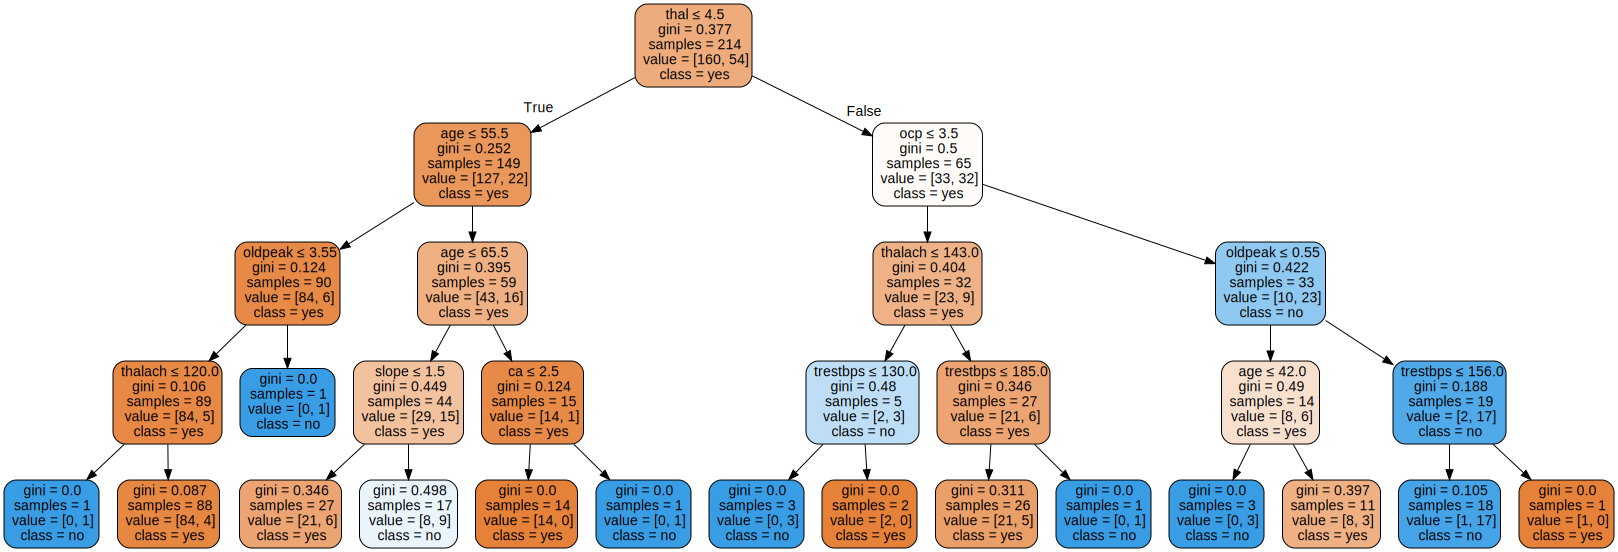

In [132]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(max_depth=4)
model_tree= model_tree.fit(X, y)
import graphviz
dot_data = tree.export_graphviz(model_tree, out_file=None,feature_names=['age', 'sex', 'ocp', 'trestbps',	'fbs',	'restecg',	'thalach'	, 'exang',	'oldpeak',	'slope',	'ca',	'thal'],class_names=["yes","no"],filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

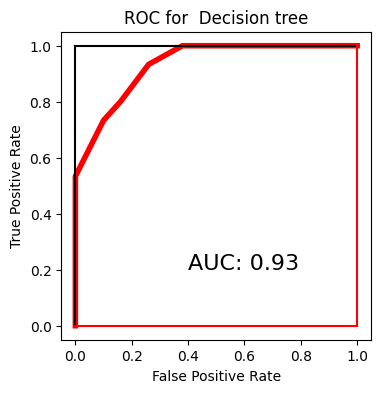

In [133]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model_tree.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  Decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='r')
plt.plot([1,1],[1,0],c='r')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [134]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[41,  9],
       [ 8,  7]])

In [135]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#tỷ lệ dự báo chính xác, tỷ lệ bao phủ và độ chính xác của mô hình phân loại cho lớp l LÀ 45%

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        50
           1       0.44      0.47      0.45        15

    accuracy                           0.74        65
   macro avg       0.64      0.64      0.64        65
weighted avg       0.74      0.74      0.74        65



In [13]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=4,random_state=1,max_samples=0.7)
model_rf.fit(X_train, y_train)
y_pred=model_rf.predict(X_test)

In [24]:
score = model_rf.score(X_test, y_test)
score

0.8615384615384616

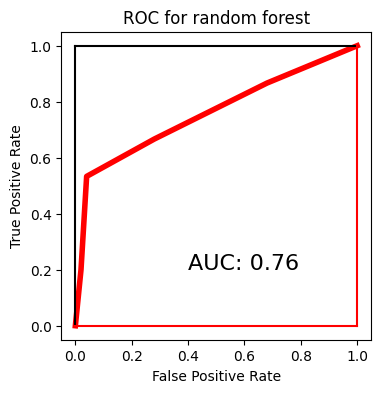

In [25]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model_rf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='r')
plt.plot([1,1],[1,0],c='r')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[48,  2],
       [ 7,  8]])

In [27]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#tỷ lệ dự báo đúng lớp 1 là 80%, tỷ lệ bao phủ là 53% và độ chính xác của mô hình phân loại cho lớp 1 là 64%

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        50
           1       0.80      0.53      0.64        15

    accuracy                           0.86        65
   macro avg       0.84      0.75      0.78        65
weighted avg       0.86      0.86      0.85        65



In [ ]:
#SVM

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
hps={
    'C': [0.001, 0.01, 0.1, 1,10, 100, 1000],
    'gamma' : [0.001, 0.01,0.1, 0.2, 0.3, 1,100,1000],
    'kernel' : ['linear']#, 'poly', 'rbf', 'sigmoid'],
}
grids= RandomizedSearchCV(SVC(),hps)

In [30]:
grids.fit(X_train, y_train)
#chưa chạy xong mã

KeyboardInterrupt: ignored

In [45]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C= 1, gamma=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [46]:
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test, y_pred)

0.8

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        50
           1       0.57      0.53      0.55        15

    accuracy                           0.80        65
   macro avg       0.72      0.71      0.71        65
weighted avg       0.80      0.80      0.80        65



In [ ]:
#mô hình naives bayes classification có tỷ lệ bao phủ lớp 1 cao nhất (67%) sẽ dự báo nhiều người bị ung thư nhất và độ chính xác của mô hình phân loại trong lớp 1 là 61%